In [33]:
## Load R libraries.

inLibraries = list('repr','rgdal','gstat','sp','spdep','rgeos','maptools','RColorBrewer','classInt','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}

library(geojsonio)

library(tidyverse)

library(sjstats)


options(repr.plot.width=15, repr.plot.height=15)


Attaching package: ‘sjstats’


The following object is masked from ‘package:survey’:

    cv


The following object is masked from ‘package:raster’:

    cv




In [2]:
meteorites_w <- read.csv("data/results/meteorites_weighted.csv",stringsAsFactors=FALSE)
meteorites_w <- subset(meteorites_w, select = -c(X) )
head(meteorites_w)
str(meteorites_w)

,id,recclass,mass_in_grams,fell_or_found,year.x,latitude,longitude,group_name,Chondrite.Achondrite,type,L3,L4,lc_sample,over_under
,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,L5,21,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,Ordinary,L,11,0.004857815
2,2,H6,720,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,Ordinary,H,1,0.297273742
3,4,H5,331,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,Ordinary,H,2,0.463225691
4,5,H3-6,21100,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,Ordinary,H,13,0.428663282
5,6,EH4,107000,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,Enstatite,EH-EL,1,0.297273742
6,7,L6,2914,Found,1941,33.85000,-101.80000,L,Chondrite,Stony,Ordinary,L,1,0.297273742


'data.frame':	9897 obs. of  14 variables:
 $ id                  : int  1 2 4 5 6 7 8 9 10 11 ...
 $ recclass            : chr  "L5" "H6" "H5" "H3-6" ...
 $ mass_in_grams       : num  21 720 331 21100 107000 ...
 $ fell_or_found       : chr  "Fell" "Fell" "Found" "Found" ...
 $ year.x              : int  1880 1951 1982 1951 1952 1941 1840 1997 1976 1989 ...
 $ latitude            : num  50.8 56.2 26.8 36.3 54.2 ...
 $ longitude           : num  6.08 10.23 -105.42 -104.28 -113 ...
 $ group_name          : chr  "L" "H" "H" "H" ...
 $ Chondrite.Achondrite: chr  "Chondrite" "Chondrite" "Chondrite" "Chondrite" ...
 $ type                : chr  "Stony" "Stony" "Stony" "Stony" ...
 $ L3                  : chr  "Ordinary" "Ordinary" "Ordinary" "Ordinary" ...
 $ L4                  : chr  "L" "H" "H" "H" ...
 $ lc_sample           : int  11 1 2 13 1 1 1 11 0 14 ...
 $ over_under          : num  0.00486 0.29727 0.46323 0.42866 0.29727 ...


In [3]:
# Want to convert some columns to factors, but first need to clean up some things that are not NA...

meteorites_w <- meteorites_w %>% replace_with_na(replace = list(Chondrite.Achondrite = "-")) 
meteorites_w <- meteorites_w %>% replace_with_na(replace = list(type = "-")) 
meteorites_w <- meteorites_w %>% replace_with_na(replace = list(L3 = "-")) 
meteorites_w <- meteorites_w %>% replace_with_na(replace = list(L4 = "-")) 
meteorites_w <- meteorites_w %>% replace_with_na(replace = list(L4 = ""))

head(meteorites_w,6L)
str(meteorites_w)

,id,recclass,mass_in_grams,fell_or_found,year.x,latitude,longitude,group_name,Chondrite.Achondrite,type,L3,L4,lc_sample,over_under
,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,L5,21,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,Ordinary,L,11,0.004857815
2,2,H6,720,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,Ordinary,H,1,0.297273742
3,4,H5,331,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,Ordinary,H,2,0.463225691
4,5,H3-6,21100,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,Ordinary,H,13,0.428663282
5,6,EH4,107000,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,Enstatite,EH-EL,1,0.297273742
6,7,L6,2914,Found,1941,33.85000,-101.80000,L,Chondrite,Stony,Ordinary,L,1,0.297273742


'data.frame':	9897 obs. of  14 variables:
 $ id                  : int  1 2 4 5 6 7 8 9 10 11 ...
 $ recclass            : chr  "L5" "H6" "H5" "H3-6" ...
 $ mass_in_grams       : num  21 720 331 21100 107000 ...
 $ fell_or_found       : chr  "Fell" "Fell" "Found" "Found" ...
 $ year.x              : int  1880 1951 1982 1951 1952 1941 1840 1997 1976 1989 ...
 $ latitude            : num  50.8 56.2 26.8 36.3 54.2 ...
 $ longitude           : num  6.08 10.23 -105.42 -104.28 -113 ...
 $ group_name          : chr  "L" "H" "H" "H" ...
 $ Chondrite.Achondrite: chr  "Chondrite" "Chondrite" "Chondrite" "Chondrite" ...
 $ type                : chr  "Stony" "Stony" "Stony" "Stony" ...
 $ L3                  : chr  "Ordinary" "Ordinary" "Ordinary" "Ordinary" ...
 $ L4                  : chr  "L" "H" "H" "H" ...
 $ lc_sample           : int  11 1 2 13 1 1 1 11 0 14 ...
 $ over_under          : num  0.00486 0.29727 0.46323 0.42866 0.29727 ...


In [4]:
#converting some columns to factors:

meteorites_w$recclass <- factor(meteorites_w$recclass)
meteorites_w$fell_or_found <- factor(meteorites_w$fell_or_found)
meteorites_w$group_name <- factor(meteorites_w$group_name)
meteorites_w$Chondrite.Achondrite <- factor(meteorites_w$Chondrite.Achondrite)
meteorites_w$type <- factor(meteorites_w$type)
meteorites_w$L3 <- factor(meteorites_w$L3)
meteorites_w$L4 <- factor(meteorites_w$L4)
meteorites_w$lc_sample <- factor(meteorites_w$lc_sample)

str(meteorites_w)

'data.frame':	9897 obs. of  14 variables:
 $ id                  : int  1 2 4 5 6 7 8 9 10 11 ...
 $ recclass            : Factor w/ 311 levels "Acapulcoite",..: 224 133 127 95 52 228 70 121 1 228 ...
 $ mass_in_grams       : num  21 720 331 21100 107000 ...
 $ fell_or_found       : Factor w/ 2 levels "Fell","Found": 1 1 2 2 1 2 2 2 1 2 ...
 $ year.x              : int  1880 1951 1982 1951 1952 1941 1840 1997 1976 1989 ...
 $ latitude            : num  50.8 56.2 26.8 36.3 54.2 ...
 $ longitude           : num  6.08 10.23 -105.42 -104.28 -113 ...
 $ group_name          : Factor w/ 53 levels "Acapulcoite",..: 40 22 22 22 18 40 22 22 1 40 ...
 $ Chondrite.Achondrite: Factor w/ 2 levels "Achondrite","Chondrite": 2 2 2 2 2 2 2 2 1 2 ...
 $ type                : Factor w/ 3 levels "Iron","Stony",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ L3                  : Factor w/ 13 levels "Asteroidal","Carbonaceous",..: 9 9 9 9 3 9 9 9 12 9 ...
 $ L4                  : Factor w/ 14 levels "CI","CM-CO","CR",..: 9 

In [5]:
levels(meteorites_w$recclass)
levels(meteorites_w$fell_or_found)
levels(meteorites_w$group_name)
levels(meteorites_w$Chondrite.Achondrite)
levels(meteorites_w$type)
levels(meteorites_w$L3)
levels(meteorites_w$L4)
levels(meteorites_w$lc_sample)

[1] "Acapulcoite"             "Achondrite-ung"         
  [3] "Angrite"                 "Aubrite"                
  [5] "Aubrite-an"              "Brachinite"             
  [7] "C"                       "C2-ung"                 
  [9] "C3-ung"                  "C4-ung"                 
 [11] "C5/6-ung"                "CBa"                    
 [13] "CBb"                     "CH/CBb"                 
 [15] "CH3"                     "Chondrite-ung"          
 [17] "CI1"                     "CK3"                    
 [19] "CK3-an"                  "CK4"                    
 [21] "CK4-an"                  "CK4/5"                  
 [23] "CK5"                     "CK6"                    
 [25] "CM-an"                   "CM1"                    
 [27] "CM2"                     "CO3"                    
 [29] "CO3.0"                   "CO3.2"                  
 [31] "CO3.3"                   "CO3.4"                  
 [33] "CO3.5"                   "CO3.6"                  
 [35] "CO3.7"                   "CO3.8"                  
 [37] "CR"                      "CR-an"                  
 [39] "CR2"                     "CR2-an"                 
 [41] "CV2"                     "CV3"                    
 [43] "CV3-an"                  "Diogenite"              
 [45] "Diogenite-olivine"       "Diogenite-pm"           
 [47] "E"                       "E4"                     
 [49] "EH"                      "EH3"                    
 [51] "EH3/4-an"                "EH4"                    
 [53] "EH4/5"                   "EH5"                    
 [55] "EH7-an"                  "EL3"                    
 [57] "EL4"                     "EL4/5"                  
 [59] "EL5"                     "EL6"                    
 [61] "EL6/7"                   "EL7"                    
 [63] "Enst achon-ung"          "Eucrite"                
 [65] "Eucrite-an"              "Eucrite-br"             
 [67] "Eucrite-cm"              "Eucrite-mmict"          
 [69] "Eucrite-pmict"           "H"                      
 [71] "H-an"                    "H-imp melt"             
 [73] "H-melt rock"             "H-metal"                
 [75] "H?"                      "H(5?)"                  
 [77] "H(L)3"                   "H(L)3-an"               
 [79] "H/L~4"                   "H/L3"                   
 [81] "H/L3.5"                  "H/L3.6"                 
 [83] "H/L3.9"                  "H/L4"                   
 [85] "H/L4-5"                  "H/L5"                   
 [87] "H/L6"                    "H~4"                    
 [89] "H~4/5"                   "H~5"                    
 [91] "H~6"                     "H3"                     
 [93] "H3-4"                    "H3-5"                   
 [95] "H3-6"                    "H3-an"                  
 [97] "H3.0-3.4"                "H3.10"                  
 [99] "H3.2"                    "H3.4"                   
[101] "H3.4-5"                  "H3.4/3.5"               
[103] "H3.5"                    "H3.6"                   
[105] "H3.6-6"                  "H3.7"                   
[107] "H3.7-5"                  "H3.7/3.8"               
[109] "H3.8"                    "H3.8-4"                 
[111] "H3.8-5"                  "H3.8-6"                 
[113] "H3.8-an"                 "H3.8/3.9"               
[115] "H3.8/4"                  "H3.9"                   
[117] "H3.9-5"                  "H3.9-6"                 
[119] "H3.9/4"                  "H3/4"                   
[121] "H4"                      "H4-5"                   
[123] "H4-6"                    "H4-an"                  
[125] "H4/5"                    "H4/6"                   
[127] "H5"                      "H5-6"                   
[129] "H5-7"                    "H5-an"                  
[131] "H5-melt breccia"         "H5/6"                   
[133] "H6"                      "H6-melt breccia"        
[135] "H7"                      "Howardite"              
[137] "Iron"                    "Iron, IAB complex"      


[1] "Fell"  "Found"

[1] "Acapulcoite"         "Achondrite"          "Angrite"            
 [4] "Aubrite"             "Brachinite"          "CB"                 
 [7] "CH"                  "Chassignite"         "Chondrite"          
[10] "CI"                  "CK"                  "CM"                 
[13] "CO"                  "CR"                  "CV"                 
[16] "Diogenite"           "Eagle Station Group" "EH"                 
[19] "EH or EL"            "EL"                  "Eucrite"            
[22] "H"                   "H,L, or LL"          "Howardite"          
[25] "Iron"                "Iron IAB"            "Iron IC"            
[28] "Iron IIAB"           "Iron IIC"            "Iron IID"           
[31] "Iron IIE"            "Iron IIF"            "Iron IIG"           
[34] "Iron IIIAB"          "Iron IIIE"           "Iron IIIF"          
[37] "Iron IVA"            "Iron IVB"            "Kakangari"          
[40] "L"                   "LL"                  "Loderanite"         
[43] "Lunar"               "Main Group"          "Mesosiderite"       
[46] "Nakhilite"           "Rumuruti"            "Shergottite"        
[49] "Stony"               "Ungrouped"           "Unknown"            
[52] "Ureilite"            "Winonaite"

[1] "Achondrite" "Chondrite"

[1] "Iron"       "Stony"      "Stony-Iron"

[1] "Asteroidal"              "Carbonaceous"           
 [3] "Enstatite"               "Magmatic"               
 [5] "Martian"                 "Mesosiderite"           
 [7] "Moon"                    "Non-magmatic"           
 [9] "Ordinary"                "Other"                  
[11] "Pallasite"               "Primitive"              
[13] "Primitive or asteroidal"

[1] "CI"                 "CM-CO"              "CR"                
 [4] "CV-CK"              "EH-EL"              "H"                 
 [7] "H-E-D Vesta"        "Kakangari grouplet" "L"                 
[10] "LL"                 "Primative"          "Rumuruti"          
[13] "Siderite"           "SNC"

[1] "0"  "1"  "2"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17"
[16] "18"

In [6]:
colnames(meteorites_w) <- c('id',
                            'recclass',
                            'mass', 
                            'fall_or_found',
                            'year',
                            'latitude',
                            'longitude',
                            'group',
                            'chondrite',
                            'type',
                            'lvl3',
                            'lvl4',
                            'lc_sample',
                            'over_under')

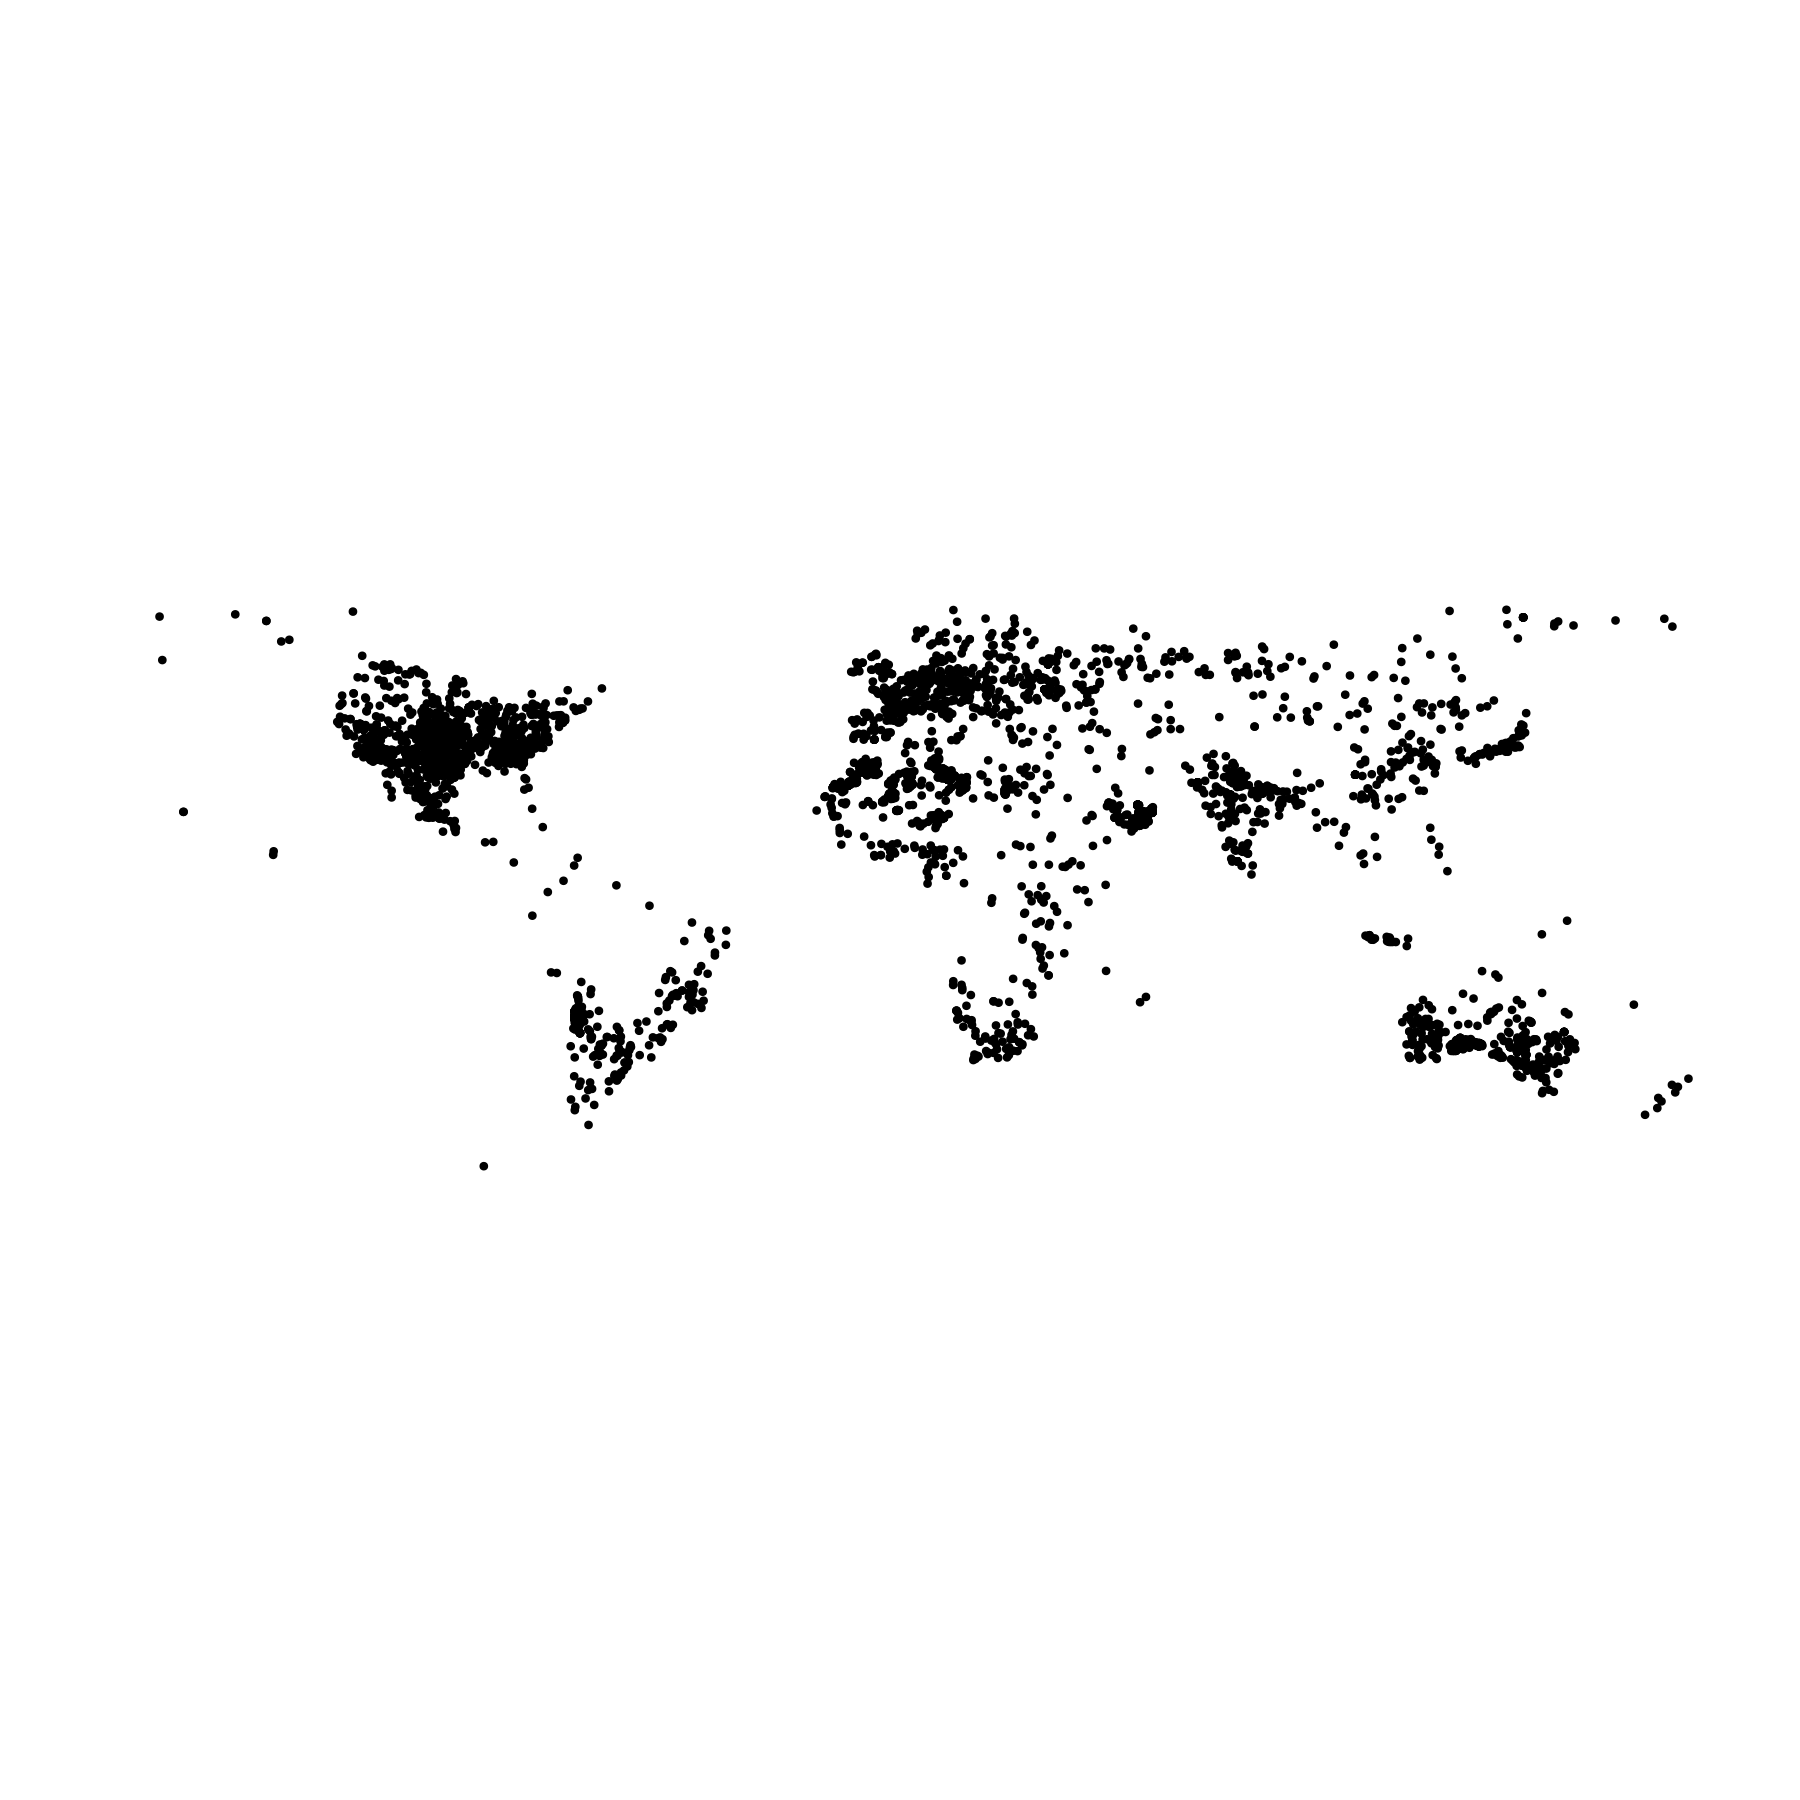

In [7]:
lat <- meteorites_w$latitude
long <- meteorites_w$longitude

ptcoords <- cbind(as.numeric(long),as.numeric(lat))

meteorites_w_spatial <- SpatialPointsDataFrame(ptcoords,data=meteorites_w)

plot(meteorites_w_spatial, pch=20)

In [8]:
#When I am rerunning the cell, don't want to rewrite the shapefile

#writeOGR(obj=meteorites_w_spatial, dsn="data/results/", layer="meteorites_weighted_sf", driver="ESRI Shapefile")

In [9]:
str(meteorites_w)

'data.frame':	9897 obs. of  14 variables:
 $ id           : int  1 2 4 5 6 7 8 9 10 11 ...
 $ recclass     : Factor w/ 311 levels "Acapulcoite",..: 224 133 127 95 52 228 70 121 1 228 ...
 $ mass         : num  21 720 331 21100 107000 ...
 $ fall_or_found: Factor w/ 2 levels "Fell","Found": 1 1 2 2 1 2 2 2 1 2 ...
 $ year         : int  1880 1951 1982 1951 1952 1941 1840 1997 1976 1989 ...
 $ latitude     : num  50.8 56.2 26.8 36.3 54.2 ...
 $ longitude    : num  6.08 10.23 -105.42 -104.28 -113 ...
 $ group        : Factor w/ 53 levels "Acapulcoite",..: 40 22 22 22 18 40 22 22 1 40 ...
 $ chondrite    : Factor w/ 2 levels "Achondrite","Chondrite": 2 2 2 2 2 2 2 2 1 2 ...
 $ type         : Factor w/ 3 levels "Iron","Stony",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ lvl3         : Factor w/ 13 levels "Asteroidal","Carbonaceous",..: 9 9 9 9 3 9 9 9 12 9 ...
 $ lvl4         : Factor w/ 14 levels "CI","CM-CO","CR",..: 9 6 6 6 5 9 6 6 NA 9 ...
 $ lc_sample    : Factor w/ 16 levels "0","1","2","6",..: 9 2

In [18]:
# Dividing into training and testing groups

set.seed(100)
sample_size <- floor(0.7 * nrow(meteorites_w_spatial))

train_ind <- sample(seq_len(nrow(meteorites_w_spatial)), size = sample_size)

meteorites_train <- meteorites_w_spatial[train_ind, ]
meteorites_test <- meteorites_w_spatial[-train_ind, ]

head(meteorites_train)
length(meteorites_train)

head(meteorites_test)
length(meteorites_test)

write.csv(meteorites_train,'data/results/meteorites_train.csv')
write.csv(meteorites_test,'data/results/meteorites_test.csv')

,id,recclass,mass,fall_or_found,year,latitude,longitude,group,chondrite,type,lvl3,lvl4,lc_sample,over_under
,<int>,<fct>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
3786,11632,L4,633.00,Found,1995,28.69167,13.21967,L,Chondrite,Stony,Ordinary,L,11,0.004857815
503,2320,L6,3200.00,Fell,1803,43.86667,5.38333,L,Chondrite,Stony,Ordinary,L,12,0.497990676
3430,10154,H4,0.83,Found,1992,-30.73783,127.95367,H,Chondrite,Stony,Ordinary,H,11,0.004857815
3696,11542,Eucrite-mmict,143.00,Found,1994,28.94550,13.06950,Eucrite,Achondrite,Stony,Asteroidal,H-E-D Vesta,11,0.004857815
4090,11944,L6,23.60,Found,1991,-30.27467,129.01850,L,Chondrite,Stony,Ordinary,L,11,0.004857815
7886,45918,LL6,425.00,Found,2006,20.01352,56.40697,LL,Chondrite,Stony,Ordinary,LL,11,0.004857815


[1] 6927

,id,recclass,mass,fall_or_found,year,latitude,longitude,group,chondrite,type,lvl3,lvl4,lc_sample,over_under
,<int>,<fct>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
3,4,H5,331,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,Ordinary,H,2,0.463225691
8,9,H4,4500,Found,1997,27.23944,29.83583,H,Chondrite,Stony,Ordinary,H,11,0.004857815
11,12,H5,228,Found,1989,27.61667,3.85000,H,Chondrite,Stony,Ordinary,H,14,0.498018660
12,13,H5,145,Found,1989,27.81667,4.03333,H,Chondrite,Stony,Ordinary,H,14,0.498018660
15,16,H3.9/4,561,Found,1989,27.63333,3.96667,H,Chondrite,Stony,Ordinary,H,14,0.498018660
16,17,L5,542,Found,1989,27.51667,3.65000,L,Chondrite,Stony,Ordinary,L,14,0.498018660


[1] 2970

In [28]:
str(meteorites_w)

'data.frame':	9897 obs. of  14 variables:
 $ id           : int  1 2 4 5 6 7 8 9 10 11 ...
 $ recclass     : Factor w/ 311 levels "Acapulcoite",..: 224 133 127 95 52 228 70 121 1 228 ...
 $ mass         : num  21 720 331 21100 107000 ...
 $ fall_or_found: Factor w/ 2 levels "Fell","Found": 1 1 2 2 1 2 2 2 1 2 ...
 $ year         : int  1880 1951 1982 1951 1952 1941 1840 1997 1976 1989 ...
 $ latitude     : num  50.8 56.2 26.8 36.3 54.2 ...
 $ longitude    : num  6.08 10.23 -105.42 -104.28 -113 ...
 $ group        : Factor w/ 53 levels "Acapulcoite",..: 40 22 22 22 18 40 22 22 1 40 ...
 $ chondrite    : Factor w/ 2 levels "Achondrite","Chondrite": 2 2 2 2 2 2 2 2 1 2 ...
 $ type         : Factor w/ 3 levels "Iron","Stony",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ lvl3         : Factor w/ 13 levels "Asteroidal","Carbonaceous",..: 9 9 9 9 3 9 9 9 12 9 ...
 $ lvl4         : Factor w/ 14 levels "CI","CM-CO","CR",..: 9 6 6 6 5 9 6 6 NA 9 ...
 $ lc_sample    : Factor w/ 16 levels "0","1","2","6",..: 9 2

In [54]:
# Weighting of the data will be with the over_under column.

# Remember, the values represent how many times the impacts are over or underrepresented for that land type.  
# So, for instance Tropical Forest (#18) makes up 1.08% of the earth's surface, but only 0.10% of the meteorite
# impact sites. The over-under is a factor of 10.744x.  

# A number > 1 means the land cover was underrepresented, while < 1 means over represented.





My hypotheses:

$H_0$:  No significant difference exist in  among vehicles of different origin

$H_1$:  Significant difference exist in miles per gallon among vehicles of different origin
